In [ ]:
import pandas as pd
import numpy as np
import tweepy 
import csv
import string
import demoji
from textblob import TextBlob 
from nltk import classify
from nltk import NaiveBayesClassifier
import random
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

# Twitter API credentials

In [ ]:
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = "" 

// Add your keys here 


# Function to extract tweets

In [ ]:
def get_all_tweets(username):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    number_of_tweets = 3000
    
    #make initial request for most recent tweets
    new_tweets = api.user_timeline(screen_name = username,count=number_of_tweets)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")

        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = username,count=number_of_tweets,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print(f"...{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.text] for tweet in alltweets]
    
    #write the csv  
    with open(f'{username}_tweets.csv', 'w', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id","text"])
        writer.writerows(outtweets)
        
    return pd.DataFrame(outtweets);
    
    pass

In [ ]:
amazonTweets = get_all_tweets("amazon")

getting tweets before 1344386790858371073
...400 tweets downloaded so far
getting tweets before 1339658075641417729
...600 tweets downloaded so far
getting tweets before 1337448383204777985
...800 tweets downloaded so far
getting tweets before 1331163433157480448
...1000 tweets downloaded so far
getting tweets before 1324740993242042374
...1200 tweets downloaded so far
getting tweets before 1317322956805165057
...1400 tweets downloaded so far
getting tweets before 1308813793779224577
...1600 tweets downloaded so far
getting tweets before 1297223262968197120
...1800 tweets downloaded so far
getting tweets before 1281027290491695110
...1999 tweets downloaded so far
getting tweets before 1262906795808493568
...2199 tweets downloaded so far
getting tweets before 1255994205891108863
...2399 tweets downloaded so far
getting tweets before 1248305383111905282
...2599 tweets downloaded so far
getting tweets before 1242196003907911679
...2799 tweets downloaded so far
getting tweets before 123100

In [ ]:
flipkartTweets = get_all_tweets("flipkart")

getting tweets before 1318849964571652095
...400 tweets downloaded so far
getting tweets before 1315956643134226432
...600 tweets downloaded so far
getting tweets before 1315919274267959295
...800 tweets downloaded so far
getting tweets before 1315893244379623423
...1000 tweets downloaded so far
getting tweets before 1294468857701085184
...1200 tweets downloaded so far
getting tweets before 1265235779279826945
...1399 tweets downloaded so far
getting tweets before 1217700580711268353
...1599 tweets downloaded so far
getting tweets before 1178629133628133375
...1799 tweets downloaded so far
getting tweets before 1166304629690257407
...1999 tweets downloaded so far
getting tweets before 1134369157464461313
...2199 tweets downloaded so far
getting tweets before 1108315883947085823
...2399 tweets downloaded so far
getting tweets before 1060021169623982079
...2599 tweets downloaded so far
getting tweets before 1049216445719007231
...2799 tweets downloaded so far
getting tweets before 103252

In [ ]:
snapdealTweets = get_all_tweets("snapdeal")

getting tweets before 1260441607360458754
...400 tweets downloaded so far
getting tweets before 1230016161699360768
...600 tweets downloaded so far
getting tweets before 1211186588958351360
...800 tweets downloaded so far
getting tweets before 1192356145358356479
...1000 tweets downloaded so far
getting tweets before 1177828060910895104
...1199 tweets downloaded so far
getting tweets before 1153869914966560769
...1399 tweets downloaded so far
getting tweets before 1136131783869706239
...1599 tweets downloaded so far
getting tweets before 1118356658973896703
...1799 tweets downloaded so far
getting tweets before 1099877143029272575
...1999 tweets downloaded so far
getting tweets before 1086181761988612095
...2199 tweets downloaded so far
getting tweets before 1074245248514088960
...2399 tweets downloaded so far
getting tweets before 1063360492385767424
...2599 tweets downloaded so far
getting tweets before 1050992027033317375
...2799 tweets downloaded so far
getting tweets before 103648

# Data Pre Processing

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbagr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
snapdealTweets.columns =['ID', 'Tweet']
amazonTweets.columns =['ID', 'Tweet']
flipkartTweets.columns = ['ID', 'Tweet']

In [ ]:
amazonTweets['Tweet']
flipkartTweets['Tweet']
snapdealTweets['Tweet']

0       Wishing a joyous and cheerful Lohri to all! ht...
1       RT @1kunalbahl: Looks like someone @snapdeal d...
2       RT @forbes_india: #2021LivingInHope As we stay...
3       An arrestingly powerful design. \nBuy now: htt...
4       For the perfect moment to make you more specia...
5       Wear the smartest deal of the day! \n⌚️⌚️ http...
6       Perfect for celebrations. 😎\n👉 https://t.co/zA...
7       A treat for your feet! 😊\n👉 https://t.co/PLsEh...
8       😃 Your closet has a need to own this look!\n👉 ...
9       A design that reflects the luxury. 😍\n👉 https:...
10      Shop from a wide range of Track-pants from FIT...
11      RT @YourStoryCo: Ecommerce major #Snapdeal sai...
12      Hey Girls! Bags that cater to your needs. 🤗 \n...
13      Watch of the day. ⌚️\nBuy now: https://t.co/U4...
14      Add some super cool styles to your closet at m...
15      Complete your look with new Balenzia collectio...
16      A great looking portable speaker with POWERFUL...
17      A coll

In [ ]:
amazonTweetsWords = amazonTweets["Tweet"].str.lower().str.split()
flipkartTweetsWords = flipkartTweets["Tweet"].str.lower().str.split()
snapdealTweetsWords = snapdealTweets["Tweet"].str.lower().str.split()

In [ ]:
amazonTweetsWords

0       [@rach_stiles, we, love, this, whole, idea., i...
1       [@vivalajadeee, thanks, for, all, the, love!, ...
2       [@rileyy_h, happy, (belated), birthady!, we'd,...
3       [@tephlondude, lucky, and, skittles, make, a, ...
4       [@mcheadle24, how, cute!, what, are, the, two,...
5       [@tephlondude, we're, happy, the, packaging, i...
6       [@robbybranscum, what, a, creative, idea, to, ...
7       [@vanguardalpha, it's, great, to, hear, you, w...
8       [@stephbump, someone, call, the, pup-arazzi!, ...
9       [@coachkelsj, what, a, fun, blast, from, the, ...
10      [@bms_mrs_gill, this, is, not, a, drill!, than...
11      [@katdvs, sounds, like, you're, living, the, t...
12      [@personaparadise, this, sounds, snack-tastic!...
13      [@stephbump, you, look, like, you, play, an, e...
14      [@bms_mrs_gill, we'd, love, to, help, with, so...
15      [@frecklesthepug, now, that's, one, precious, ...
16      [@sparkleskind, we'd, love, to, send, some, ne...
17      [@rach

In [ ]:
flipkartTweetsWords

0       [products, with, natural, ingredients, like, c...
1       [here’s, what’s, cooking, to, make, for, a, tr...
2       [the, new, face, of, fitness, is, here., jumps...
3       [want, the, perfect, pictures, from, your, nig...
4       [these, effortless, and, quick, hacks, using, ...
5       [with, new, technology, emerging, in, the, mar...
6       [get, that, look, that, makes, you, wanna, gro...
7       [mummy, asking, 'chappal, khaaoge?', hitting, ...
8       [looking, for, the, perfect, scent, for, your,...
9       [are, your, alarms, set?, the, pre-order, for,...
10      [rt, @flipkartstories:, join, @nitiaayog, @fli...
11      [looking, for, the, latest, looks, for, your, ...
12      [rt, @flipkartstories:, save, the, date:, jan,...
13      [rt, @flipkartstories:, stay, tuned, for, the,...
14      [the, big, reveal, 📢📢📢, introducing, ⬇️⬇️⬇️⬇️⬇...
15      [here, are, our, top, 10, resolutions🔥🔥🔥, how,...
16      [our, final, resolution, for, 2021🔥🔥, resoluti...
17      [@voot

In [ ]:
snapdealTweetsWords

0       [wishing, a, joyous, and, cheerful, lohri, to,...
1       [rt, @1kunalbahl:, looks, like, someone, @snap...
2       [rt, @forbes_india:, #2021livinginhope, as, we...
3       [an, arrestingly, powerful, design., buy, now:...
4       [for, the, perfect, moment, to, make, you, mor...
5       [wear, the, smartest, deal, of, the, day!, ⌚️⌚...
6       [perfect, for, celebrations., 😎, 👉, https://t....
7       [a, treat, for, your, feet!, 😊, 👉, https://t.c...
8       [😃, your, closet, has, a, need, to, own, this,...
9       [a, design, that, reflects, the, luxury., 😍, 👉...
10      [shop, from, a, wide, range, of, track-pants, ...
11      [rt, @yourstoryco:, ecommerce, major, #snapdea...
12      [hey, girls!, bags, that, cater, to, your, nee...
13      [watch, of, the, day., ⌚️, buy, now:, https://...
14      [add, some, super, cool, styles, to, your, clo...
15      [complete, your, look, with, new, balenzia, co...
16      [a, great, looking, portable, speaker, with, p...
17      [a, co

In [ ]:
amazonStop = amazonTweetsWords.apply(lambda x: [item for item in x if item not in stopwords])
flipkartStop = flipkartTweetsWords.apply(lambda x: [item for item in x if item not in stopwords])
snapdealStop = snapdealTweetsWords.apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
# removing punctuations
amazonTweetsWordsUpdated = amazonStop.apply(lambda x:' '.join([i for i in x 
                                                  if i not in string.punctuation]))
flipkartTweetsWordsUpdated = flipkartStop.apply(lambda x:' '.join([i for i in x 
                                                  if i not in string.punctuation]))
snapdealTweetsWordsUpdated = snapdealStop.apply(lambda x:' '.join([i for i in x 
                                                  if i not in string.punctuation]))

In [ ]:
amazonTweetsWordsUpdated

0       @rach_stiles love whole idea. fact, we'd like ...
1       @vivalajadeee thanks love! 🤗💙 think pretty gre...
2       @rileyy_h happy (belated) birthady! we'd love ...
3       @tephlondude lucky skittles make wonderful tea...
4       @mcheadle24 cute! two commands son likes give ...
5       @tephlondude we're happy packaging cat approve...
6       @robbybranscum creative idea keep students eng...
7       @vanguardalpha great hear finally able find bo...
8       @stephbump someone call pup-arazzi! 🐕 📸 we've ...
9       @coachkelsj fun blast past! 🎵 🎶 still remember...
10      @bms_mrs_gill drill! thank everything students...
11      @katdvs sounds like living tub life!😎 🛀 🧼 noth...
12      @personaparadise sounds snack-tastic! make sur...
13      @stephbump look like play excellent game fetch...
14      @bms_mrs_gill we'd love help new books new yea...
15      @frecklesthepug that's one precious pug mug! 😍...
16      @sparkleskind we'd love send new reading mater...
17      @rach_

In [ ]:
flipkartTweetsWordsUpdated

0       products natural ingredients like coconuts, al...
1       here’s what’s cooking make trendy ‘21? get fre...
2       new face fitness here. jumpstart fitness journ...
3       want perfect pictures night out? best class ph...
4       effortless quick hacks using nivea lip balm ma...
5       new technology emerging market, smartphone lov...
6       get look makes wanna groove. get latest fashio...
7       mummy asking 'chappal khaaoge?' hitting way di...
8       looking perfect scent perfect occasion? introd...
9         alarms set? pre-order ps5 starts 12pm tomorrow!
10      rt @flipkartstories: join @nitiaayog @flipkart...
11      looking latest looks home? give fresh start 20...
12      rt @flipkartstories: save date: jan 11, 3 pm. ...
13      rt @flipkartstories: stay tuned launch renewed...
14      big reveal 📢📢📢 introducing ⬇️⬇️⬇️⬇️⬇️⬇️⬇️ flip...
15      top 10 resolutions🔥🔥🔥 1⃣ single plan solve res...
16      final resolution 2021🔥🔥 resolution #10🔟 we’re ...
17      @voots

In [ ]:
snapdealTweetsWordsUpdated

0       wishing joyous cheerful lohri all! https://t.c...
1       rt @1kunalbahl: looks like someone @snapdeal m...
2       rt @forbes_india: #2021livinginhope stayed hom...
3       arrestingly powerful design. buy now: https://...
4       perfect moment make special. 😍 buy now: https:...
5       wear smartest deal day! ⌚️⌚️ https://t.co/xtdd...
6       perfect celebrations. 😎 👉 https://t.co/za54ulu...
7       treat feet! 😊 👉 https://t.co/plsehoweec #shopf...
8       😃 closet need look! 👉 https://t.co/4fc24zp3yj ...
9       design reflects luxury. 😍 👉 https://t.co/0twpm...
10      shop wide range track-pants fitmonkey. 👉 https...
11      rt @yourstoryco: ecommerce major #snapdeal sai...
12      hey girls! bags cater needs. 🤗 👉 https://t.co/...
13      watch day. ⌚️ buy now: https://t.co/u4nem5onyf...
14      add super cool styles closet min 60% off. 👉 ht...
15      complete look new balenzia collection cushione...
16      great looking portable speaker powerful sound....
17      collec

In [ ]:
demoji.download_codes()

... OK (Got response in 1.00 seconds)
Writing emoji data to C:\Users\sbagr\.demoji\codes.json ...
... OK


In [ ]:
demojiDict = []
for word in amazonTweetsWordsUpdated:
    demojiWord = demoji.findall(word)
    if len(demojiWord) != 0:
        demojiDict.append(demojiWord)
    
# demojiDict


In [ ]:
len(demojiDict)
type(demojiDict[0])
demojiDict[0].items()

dict_items([('👍', 'thumbs up'), ('🤗', 'hugging face'), ('😀', 'grinning face'), ('📦', 'package'), ('💙', 'blue heart')])

In [ ]:
demojiArray = []
for i in range(len(demojiDict)):
    keys = demojiDict[i].keys()
    demojiArray.append(keys)

# demojiArray

# Wordcloud - Amazon, Flipkart, Snapdeal

In [ ]:
stopwords = set(STOPWORDS) 

In [ ]:
def get_token(data):
    comment_words = '' 
    for val in data: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "
    return comment_words

# Amazon World Cloud

In [ ]:
amazonWords = get_token(amazonTweetsWordsUpdated)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(amazonWords) 

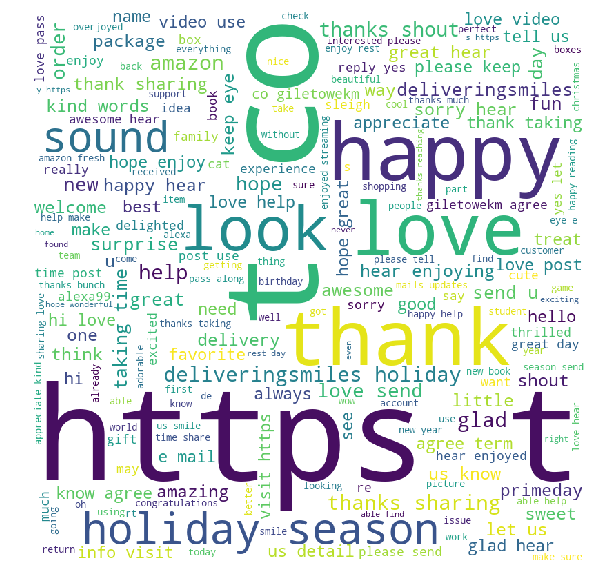

In [ ]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Flipkart World Cloud

In [ ]:
flipkartWords = get_token(flipkartTweetsWordsUpdated)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(flipkartWords)

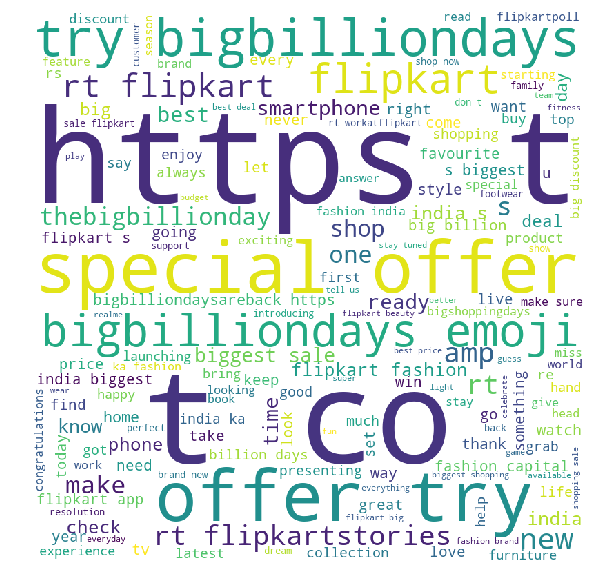

In [ ]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Snapdeal World Cloud

In [ ]:
snapdealWords = get_token(snapdealTweetsWordsUpdated)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(snapdealWords) 

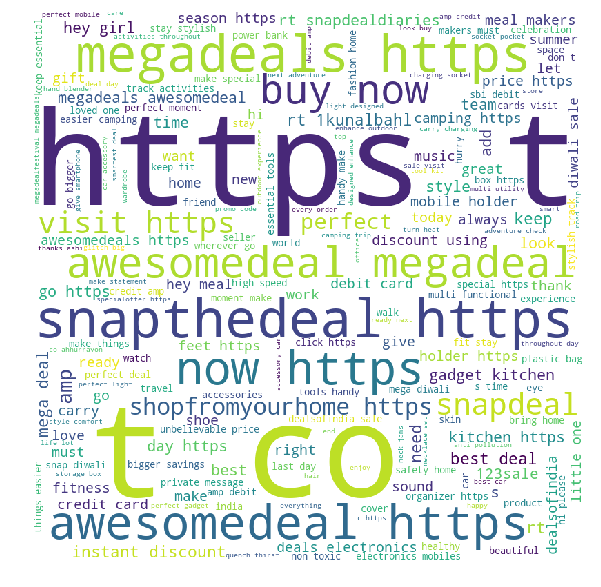

In [ ]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Getting sentiments from the original tweets

In [ ]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        positive = []
        negative = []
        neutral = []
        for i in range(len(tweet)):
            sentence = tweet[i]
            # create TextBlob object of passed tweet text 
            analysis = TextBlob(sentence) 
            # set sentiment 
            print(analysis.sentiment.polarity)
            if analysis.sentiment.polarity > 0:
                positive.append(sentence)
#                 return 'positive'
            elif analysis.sentiment.polarity == 0: 
                negative.append(sentence)
#                 return 'neutral'
            else: 
                neutral.append(sentence)
#                 return 'negative'
            
        return positive, negative, neutral

In [ ]:
amazonSentimentPositive, amazonSentimentNegative, amazonSentimentNeutral = get_tweet_sentiment(amazonTweets['Tweet'])

0.39999999999999997
0.51875
0.45625
0.5083333333333333
0.625
1.0
0.3625
0.8083333333333332
0.5
-0.0062500000000000056
0.0
0.5
0.5
0.25
0.2831439393939394
0.3
0.3068181818181818
0.1375
0.0
0.0
0.6
0.7666666666666666
0.5375
0.25
0.8125
0.0
0.5
0.25
-0.625
0.3125
0.15
0.0
0.44999999999999996
-0.375
0.7
0.36818181818181817
-0.5416666666666667
0.8125
-0.5
0.0
1.0
0.625
0.85
-0.3125
0.0
0.0
0.0
-0.625
0.0
0.5208333333333334
0.18011363636363636
0.17045454545454544
0.3125
0.2
1.0
0.375
0.0
0.5625
1.0
0.08281250000000001
0.16666666666666666
0.023484848484848487
-0.5
0.5
0.6
0.18459595959595956
0.712121212121212
0.39999999999999997
0.0
0.39999999999999997
0.4916666666666667
0.0
-0.625
0.3806818181818182
0.1
0.75
0.3318181818181818
0.8333333333333334
-0.017857142857142842
0.0
0.5
0.609375
0.525
0.0
0.45
0.0
0.25
0.35
0.0
0.6666666666666666
0.0
0.75
-0.2
0.5681818181818181
0.13636363636363635
0.46875
0.0
0.0
0.0
1.0
-0.3833333333333333
0.0
0.8333333333333334
0.0
0.5625
0.16666666666666666
1.0
0.38

-0.06666666666666667
0.0
0.0
0.0
0.0
0.34545454545454546
0.0
-0.5
-0.5
-0.5
0.0
0.04999999999999999
-0.2
-0.6499999999999999
-0.6499999999999999
-0.6499999999999999
-0.5
0.5
-0.5
0.0
0.0
-0.5
-0.6499999999999999
0.0
-0.25
0.25
0.25
0.225
-0.6499999999999999
0.5
0.25
-0.5
0.25
0.25
0.0
0.0
0.0
0.3
-0.5
0.0
0.25
0.5
0.0
-0.5
0.6
0.0
-0.5
0.0
-0.5
-0.175
-0.6499999999999999
0.5
0.6
-0.5
0.0
-0.5
0.4
0.2
0.0
0.0
-0.5
-0.6499999999999999
0.5
0.0
0.0
0.5
-0.6499999999999999
-0.6499999999999999
0.0
0.0
0.0
0.0
0.0
0.0
-0.625
-0.08333333333333333
-0.5
0.2
0.4
-0.30357142857142855
-0.65
0.0
-0.3
0.0175
0.3666666666666667
0.0
0.1
-0.24166666666666667
0.0
0.0
0.0
0.0
0.0
0.0
-0.5
0.15833333333333333
0.8
0.2
0.0
0.26666666666666666
0.0
0.625
0.0
0.0
-0.5
0.0
-0.625
-0.5
0.2
0.225
0.0
0.5625
0.34375
0.35179924242424243
-0.625
0.5375
1.0
0.225
0.27499999999999997
0.5
0.0
0.625
0.4204545454545454
0.0
-0.5
0.65625
0.5583333333333333
1.0
0.25
0.6083333333333334
0.25
0.0
0.5599999999999999
0.625
0.50833

0.0
0.8750000000000001
0.375
0.0
0.0
-0.25
0.625
0.0
0.0
0.875
0.5
1.0
0.3
0.0
0.0
0.625
0.625
0.0
0.7500000000000001
0.625
1.0
0.625
0.0
1.0
0.0
0.4375
0.0
1.0
0.25
0.09375
0.0
0.4375
0.0
0.5
0.7
0.5
0.41111111111111115
0.4375
0.0
0.0
0.0
0.25
0.0
0.0
0.45
0.65
0.0
0.5
0.0
0.0
0.0
0.7500000000000001
0.0
0.0
0.0
0.5833333333333334
0.0
0.0
0.6000000000000001
0.0
-0.0953125
0.4
0.375
0.0
0.0
0.625
0.0
0.5
0.5416666666666667
0.0
0.0
0.4
0.6499999999999999
0.0
0.0
0.41666666666666663
1.0
0.5
0.35
0.0
0.5
0.6
0.6
0.6000000000000001
0.48750000000000004
0.55
0.13636363636363635
0.8
0.625
0.12291666666666663
0.0
-0.08333333333333333
0.0
0.0
0.13636363636363635
0.25
0.5583333333333333
0.525
0.0
0.3181818181818182
-0.78125
0.5
0.0
-0.125
0.4166666666666667
0.3
0.5166666666666667
1.0
0.0
0.0
0.0
0.0
0.78125
0.5
0.3
1.0
0.0
0.625
0.5
0.17045454545454544
0.5
-0.20833333333333334
0.5
0.0
0.41666666666666663
0.75
0.0
0.1875
0.75
0.3571428571428571
0.0
0.2765151515151515
0.75
0.509090909090909
0.75
0.

In [ ]:
flipkartSentimentPositive, flipkartSentimentNegative, flipkartSentimentNeutral = get_tweet_sentiment(flipkartTweets['Tweet'])

0.1
0.44999999999999996
0.17045454545454544
0.6666666666666666
0.16666666666666666
0.3181818181818182
0.5
0.0
0.6666666666666666
0.0
0.0
0.43333333333333335
0.0
0.0
0.047619047619047616
0.2142857142857143
0.0
0.0
0.13636363636363635
0.3333333333333333
0.5
0.0
0.33125
0.0
0.25
0.0
0.0
0.0
0.13636363636363635
1.0
0.0
0.0
0.0
0.0
0.375
0.25
0.25
0.26633522727272724
-0.14305555555555555
0.17045454545454544
-0.08333333333333331
0.2787878787878788
0.13636363636363635
0.6
0.3333333333333333
0.3333333333333333
0.0
0.20833333333333334
0.4
0.175
0.035198135198135194
0.39015151515151514
0.21818181818181817
0.0
0.18522727272727274
-0.1875
0.375
0.0
0.5083333333333333
0.4666666666666666
0.29444444444444445
0.25757575757575757
-0.03181818181818183
0.65
0.16792929292929293
-0.44166666666666654
0.5
0.26666666666666666
0.8
0.3
0.25
0.2910714285714286
0.0
0.0
0.375
0.4
0.0
0.4
1.0
0.6
0.23116883116883116
0.3
0.3
0.12857142857142856
0.4625
0.08522727272727272
1.0
0.0
0.3333333333333333
0.0
1.0
0.625
0.3


0.3676136363636363
0.16666666666666666
-0.5
0.0
0.3181818181818182
0.19999999999999998
-0.1416666666666667
0.0
0.43333333333333335
0.85
0.25
0.0
0.0
0.0
0.19999999999999998
0.5
0.25
0.65
0.5
0.25
0.1
0.13636363636363635
-0.031250000000000014
0.25
0.16818181818181818
0.03333333333333333
-0.16666666666666666
0.790625
-0.25
-0.05
0.0
0.5
0.5
0.5238095238095238
0.0
0.7
0.0
0.0
0.5
0.18
0.9375
0.0
0.5
0.03333333333333333
0.359375
0.0
-0.11666666666666668
0.225
0.19259259259259257
0.10000000000000002
0.44523809523809527
0.0
0.056818181818181816
0.01874999999999999
0.625
0.875
-0.4
-0.3
0.06818181818181818
0.033333333333333326
0.5
0.10000000000000003
0.25
-0.09375
0.07878787878787878
0.0
0.125
0.02272727272727272
0.26666666666666666
0.0
0.5
0.0
0.1481818181818182
0.0
0.0
0.5
1.0
-0.5
0.5
0.0
-0.11875
0.7125
-0.020000000000000018
0.5
0.0
0.0
0.5
0.125
0.5
0.0
0.1140625
0.0
0.2130681818181818
0.13636363636363635
0.1
0.6333333333333333
0.1630952380952381
0.48571428571428577
0.0
0.268181818181818

-0.16666666666666666
0.21212121212121213
0.215
0.3
1.0
0.2916666666666667
0.0
0.3
0.625
0.0
0.75
0.6428571428571428
0.15
0.0
0.0
-0.3
0.0
0.06818181818181818
0.75
0.2734848484848485
0.13636363636363635
-0.4
-0.4
0.06666666666666665
0.0
0.5
0.0
0.0
0.3125
0.2
0.0
0.0
0.2333333333333333
0.14285714285714285
0.2
0.0
0.5
0.4928571428571429
0.0
0.35714285714285715
0.2
0.0
0.0
0.0
0.0
-0.2
0.25
-0.4
0.25
0.13636363636363635
0.28125
0.28125
0.5875
0.5
0.25
0.75
0.2416666666666667
-0.4
0.25
0.5875
0.625
0.25
0.0
0.625
0.4
0.0
0.0
0.4
0.0
0.4
0.20000000000000004
0.0
0.0
0.0
0.0
0.4
0.0
0.0
0.0
0.0
0.25
0.0
0.5625
0.0
0.0
0.5
-0.09722222222222222
1.0
1.0
0.0
0.25
0.5
0.0
0.7000000000000001
0.3234848484848485
1.0
-0.09722222222222222
0.7000000000000001
0.3234848484848485
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.53
0.3
0.0
0.53
0.4708333333333334
0.4
0.0
0.0
0.0
0.0
0.16666666666666666
0.0
0.0
0.17261904761904762
0.25
-0.15625
-0.15625
0.0
0.0
0.4055555555555556
0.4055555555555556
0.5
0.39999999999999997
0.4


In [ ]:
snapdealSentimentPositive, snapdealSentimentNegative, snapdealSentimentNeutral = get_tweet_sentiment(snapdealTweets['Tweet'])

0.5
-0.3333333333333333
0.0
0.3
0.6190476190476191
0.0
1.0
0.0
0.75
0.0
-0.1
0.0625
0.0
0.0
0.3416666666666667
0.11818181818181818
0.5
0.625
0.0
0.45
0.7500000000000001
-0.1
0.0
0.0
0.75
0.0
0.25
0.0
0.5
0.0
0.75
0.6190476190476191
0.0
0.0
0.0
1.0
0.4375
1.0
0.8
0.5416666666666667
0.0
0.0
0.3
0.7166666666666667
0.13636363636363635
0.0
0.0
0.1
0.6190476190476191
0.75
0.3
0.5
0.0
1.0
0.0
0.0
0.13636363636363635
0.16666666666666666
0.09999999999999999
0.55
0.0
0.11666666666666665
0.0
0.55
0.1
0.0
0.4083333333333334
0.0
0.875
0.6190476190476191
1.0
0.0
0.09943181818181818
0.0
1.0
0.4
0.0
0.26
0.0
0.0
0.20833333333333331
0.5
0.0
0.6125
0.0
1.0
0.0
0.875
0.5
0.75
0.0
0.0
0.0
0.3
1.0
0.0
0.0
0.3
0.2875
0.45
0.0
0.8
0.7375
0.7500000000000001
0.7166666666666667
0.2
0.0625
0.0
0.8
0.75
1.0
0.0
0.875
0.8
0.0
0.0
0.36
0.725
0.75
0.45
0.3
0.4083333333333334
1.0
0.0
1.0
0.0
0.8
0.0
0.13
0.75
0.0
0.75
0.26666666666666666
0.0
0.2
0.22499999999999998
0.4440476190476191
0.6428571428571428
0.45
0.0
0.0
0

0.44999999999999996
0.41666666666666663
0.0
0.4
0.925
0.0
0.0
0.0
0.6
0.0
1.0
0.5625
1.0
0.0
-0.25
0.0
-0.25
0.47500000000000003
0.7
0.75
0.75
1.0
0.0
0.0
0.1
0.0
0.3125
0.6
0.5
1.0
0.6785714285714286
0.43333333333333335
0.0
0.2375
0.5
0.0
0.35
0.0
-0.25
0.0
0.35
0.0
0.0
0.0
-0.13181818181818183
1.0
-0.390625
0.6
0.85
1.0
0.575
0.4
0.0
1.0
0.390625
1.0
0.925
0.5
0.2375
0.75
0.0
0.35
0.41666666666666663
0.0
0.0
0.1328125
0.0
0.625
0.0
0.41666666666666663
0.0
0.16
0.13636363636363635
0.0
0.0
0.0
0.0
-0.1
-0.13333333333333333
0.35416666666666663
0.9
0.0
0.5
0.13636363636363635
0.0
0.0
1.0
0.5
0.2857142857142857
0.4
0.75
1.0
0.0
0.0
0.26666666666666666
0.43333333333333335
0.8
0.39285714285714285
0.9
0.0
0.0
1.0
0.0
0.0
0.0
0.43333333333333335
1.0
-0.13333333333333333
0.0
-0.13181818181818183
0.5
0.0
0.43333333333333335
0.5
0.35
0.0
0.575
0.6666666666666666
0.0
0.7
0.35
0.4
0.7
0.2
0.22777777777777777
0.3125
-0.14285714285714285
1.0
0.25
0.0
0.2916666666666667
0.0
0.0
0.35416666666666663
0.

In [ ]:
def adding_sentiment(positive, negative, neutral):
    df1 =pd.DataFrame(positive)
    df2 =pd.DataFrame(negative)
    df3 = pd.DataFrame(neutral)
    df1['Sentiment'] = pd.Series(['Positive' for x in range(len(df1.index))])
    df2['Sentiment'] = pd.Series(['Negative' for x in range(len(df2.index))])
    df3['Sentiment'] = pd.Series(['Neutral' for x in range(len(df3.index))])
    columns = ['Tweet', 'Sentiment']
    df1.columns = columns
    df2.columns = columns
    df3.columns = columns
    return df1, df2, df3

# Sentiments of Amazon Tweets

In [ ]:
amazon1, amazon2, amazon3 = adding_sentiment(amazonSentimentPositive, amazonSentimentNegative, amazonSentimentNeutral)

In [ ]:
amazondf = pd.concat([amazon1, amazon2, amazon3],ignore_index=True)


In [ ]:
amazondf = amazondf.sample(frac=1)
amazondf

,Tweet,Sentiment
620,@_sabrinanina Thanks for sharing the 💗! We hop...,Positive
1703,@parkerawilliams Sounds like she knows what sh...,Positive
1555,@SalmanDahlia Thanks so much for the shout-out...,Positive
342,@JenniHanson23 Woo-hoo! 🎉 Congratulations on c...,Positive
1897,@jakober20 Thanks for sharing this kind and wo...,Positive
139,@ehernandez_20 Well you know what they say: Ho...,Positive
2796,"@CallMeRashad We wish you a Merry Christmas, R...",Negative
2971,"@TheGroc Decorate for the holidays, you must! ...",Negative
1374,@kissmyelite 🎨 Your coloring page looks fabulo...,Positive
2579,@JustDrewIt33 😊 ❤️ 👍,Negative


In [ ]:
amazondf.to_csv('amazon_tweets_sentiments.csv')

# Sentiments of Flipkart Tweets

In [ ]:
flipkart1, flipkart2, flipkart3 = adding_sentiment(flipkartSentimentPositive, flipkartSentimentNegative, flipkartSentimentNeutral)

In [ ]:
flipkartdf = pd.concat([flipkart1, flipkart2, flipkart3],ignore_index=True)

In [ ]:
flipkartdf = flipkartdf.sample(frac=1)
flipkartdf

,Tweet,Sentiment
70,Start the wedding season right with amazing de...,Positive
2892,RT @FlipkartStories: Why stay in and age grace...,Negative
407,"@anupam_doorwar To get the special offer, try ...",Positive
1617,RT @AmiMishra14: Beautiful ❤ https://t.co/HgL6...,Positive
2606,What would you like your vote to count for? #F...,Negative
3032,Tired of staring at your screen all day? Get B...,Neutral
274,"@vishalchhayani To get the special offer, try ...",Positive
2424,@rajesh_krisu 🙏🏾,Negative
2980,RT @Flipkart: Worried about dropping your phon...,Negative
1872,RT @manojshesh24: #FlipkartPlus customers are ...,Positive


In [ ]:
flipkartdf.to_csv('flipkart_tweets_sentiments.csv')

# Sentiments of Snapdeal Tweets

In [ ]:
snapdeal1, snapdeal2, snapdeal3 = adding_sentiment(snapdealSentimentPositive, snapdealSentimentNegative, snapdealSentimentNeutral)

In [ ]:
snapdealdf = pd.concat([snapdeal1, snapdeal2, snapdeal3],ignore_index=True)


In [ ]:
snapdealdf = snapdealdf.sample(frac=1)
snapdealdf

,Tweet,Sentiment
1914,"Leak-proof, unbreakable, contemporary design! ...",Positive
402,Give your back and neck a much needed respite ...,Positive
2921,This independence day we salute the courage an...,Negative
2857,The backpacker's ultimate friend! 🔦 https://t....,Negative
1587,WiFi on the go. Be always connected with the e...,Positive
1335,An endless supply of warm water with Bajaj Imm...,Positive
746,RT @1kunalbahl: Fun day @snapdeal! 🎉👧👦#bringki...,Positive
2052,RT @1kunalbahl: The team @snapdeal is with the...,Negative
1856,Click. Click. Click. The world is your frame! ...,Positive
2112,"Crafted to perfection, just for you. 🤗\n👉 http...",Negative


In [ ]:
snapdealdf.to_csv('snapdeal_tweets_sentiments.csv')